<a href="https://colab.research.google.com/github/darien-schettler/Tensorflow-Specialization/blob/master/Testing_Competency_With_Generators_and_Flow_From_Dict_And_Callback_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

# We are creating new class by extending tf.keras.callbacks.Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}): 
    if logs.get("acc")>DESIRED_ACCURACY:
      self.model.stop_training = True
      print("\n\nReached {0:.3} Accuracy... Stopping Training".format(DESIRED_ACCURACY*100))
      
callbacks = myCallback()

--2019-08-01 16:53:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-08-01 16:53:22 (122 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Directory with our training pictures
happy_dir = os.path.join('/tmp/h-or-s/happy')
sad_dir = os.path.join('/tmp/h-or-s/sad')

In [0]:
print(os.listdir(happy_dir))

['happy2-19.png', 'happy1-03.png', 'happy1-09.png', 'happy2-11.png', 'happy2-17.png', 'happy2-09.png', 'happy2-16.png', 'happy2-01.png', 'happy1-11.png', 'happy2-02.png', 'happy1-16.png', 'happy1-07.png', 'happy1-02.png', 'happy2-00.png', 'happy1-08.png', 'happy1-18.png', 'happy1-05.png', 'happy1-15.png', 'happy2-04.png', 'happy1-04.png', 'happy2-12.png', 'happy2-14.png', 'happy1-10.png', 'happy2-15.png', 'happy2-10.png', 'happy1-14.png', 'happy1-00.png', 'happy1-13.png', 'happy1-19.png', 'happy2-13.png', 'happy2-18.png', 'happy2-03.png', 'happy2-05.png', 'happy1-01.png', 'happy2-07.png', 'happy1-06.png', 'happy2-08.png', 'happy1-12.png', 'happy1-17.png', 'happy2-06.png']


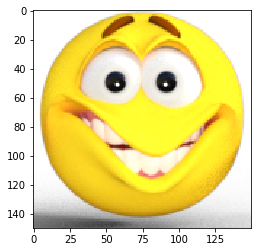

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

full_path_for_one_image = os.path.join(happy_dir, 'happy2-19.png')

img = mpimg.imread(full_path_for_one_image)
plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('happy') and 1 for the other ('sad')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [0]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
20/20 [==============================] - 6s 291ms/step - loss: 0.8765 - acc: 0.6000
Epoch 2/15
20/20 [==============================] - 5s 240ms/step - loss: 0.2366 - acc: 0.8625
Epoch 3/15
20/20 [==============================] - 5s 240ms/step - loss: 0.1171 - acc: 0.9250
Epoch 4/15
20/20 [==============================] - 5s 242ms/step - loss: 0.0441 - acc: 0.9875
Epoch 5/15
19/20 [===========================>..] - ETA: 0s - loss: 0.0034 - acc: 1.0000

Reached 99.9 Accuracy... Stopping Training
20/20 [==============================] - 5s 244ms/step - loss: 0.0032 - acc: 1.0000
